In [2]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aqi=pd.read_csv("aqi.csv")

In [4]:
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [5]:
aqi1=aqi.dropna(axis=1)
aqi1

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...
...,...,...,...,...,...,...,...,...
235780,01-04-2022,Bihar,Arrah,1,PM10,210,Poor,number_of_monitoring_stations in Absolute Numb...
235781,01-04-2022,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...
235782,01-04-2022,Maharashtra,Chandrapur,2,PM2.5,201,Poor,number_of_monitoring_stations in Absolute Numb...
235783,01-04-2022,Uttar Pradesh,Varanasi,4,PM10,128,Moderate,number_of_monitoring_stations in Absolute Numb...


In [6]:
aqi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   date                           235785 non-null  object
 1   state                          235785 non-null  object
 2   area                           235785 non-null  object
 3   number_of_monitoring_stations  235785 non-null  int64 
 4   prominent_pollutants           235785 non-null  object
 5   aqi_value                      235785 non-null  int64 
 6   air_quality_status             235785 non-null  object
 7   unit                           235785 non-null  object
dtypes: int64(2), object(6)
memory usage: 14.4+ MB


In [7]:
print(aqi1['date'].astype(str).head(10).tolist())


['30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025', '30-04-2025']


In [8]:
# Step 1: Clean any invisible whitespace (just to be safe)
aqi1['date'] = aqi1['date'].astype(str).str.strip()

# Step 2: Convert using the exact format
aqi1['date'] = pd.to_datetime(aqi1['date'], format='%d-%m-%Y', errors='coerce')

# Step 4: Verify a few dates
print(aqi1['date'].head())


0   2025-04-30
1   2025-04-30
2   2025-04-30
3   2025-04-30
4   2025-04-30
Name: date, dtype: datetime64[ns]


C:\Users\91935\AppData\Local\Temp\ipykernel_17584\3385762070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi1['date'] = aqi1['date'].astype(str).str.strip()
C:\Users\91935\AppData\Local\Temp\ipykernel_17584\3385762070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi1['date'] = pd.to_datetime(aqi1['date'], format='%d-%m-%Y', errors='coerce')


In [9]:
start_date = '2024-12-01'
end_date = '2025-05-31'

aqi_filtered = aqi1[(aqi1['date'] >= start_date) & (aqi1['date'] <= end_date)]
print(aqi_filtered.shape)


(34878, 8)


In [10]:
aqi_filtered.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...


In [11]:
aqi_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34878 entries, 0 to 34877
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           34878 non-null  datetime64[ns]
 1   state                          34878 non-null  object        
 2   area                           34878 non-null  object        
 3   number_of_monitoring_stations  34878 non-null  int64         
 4   prominent_pollutants           34878 non-null  object        
 5   aqi_value                      34878 non-null  int64         
 6   air_quality_status             34878 non-null  object        
 7   unit                           34878 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.4+ MB


In [12]:
# Group by state and area
avg_aqi = aqi_filtered.groupby(['state', 'area'])['aqi_value'].mean().reset_index()

avg_aqi_sorted = avg_aqi.sort_values(by='aqi_value', ascending=False)

top_5 = avg_aqi_sorted.head(5)
bottom_5 = avg_aqi_sorted.tail(5)

print("Top 5 Most Polluted Areas (with states):\n", top_5)
print("\nBottom 5 Cleanest Areas (with states):\n", bottom_5)


Top 5 Most Polluted Areas (with states):
       state         area   aqi_value
11    Assam     Byrnihat  284.194915
50    Delhi        Delhi  238.920000
27    Bihar      Hajipur  233.666667
59  Haryana  Bahadurgarh  226.437500
66  Haryana     Gurugram  204.143836

Bottom 5 Cleanest Areas (with states):
           state            area  aqi_value
90    Karnataka  Chamarajanagar  44.807692
111   Karnataka      Vijayapura  44.328767
103   Karnataka        Madikeri  42.951049
242  Tamil Nadu   Palkalaiperur  42.794872
250  Tamil Nadu     Tirunelveli  33.310078


C:\Users\91935\AppData\Local\Temp\ipykernel_17584\2013570742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['label'] = top_5['area'] + " (" + top_5['state'] + ")"
C:\Users\91935\AppData\Local\Temp\ipykernel_17584\2013570742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_5['label'] = bottom_5['area'] + " (" + bottom_5['state'] + ")"


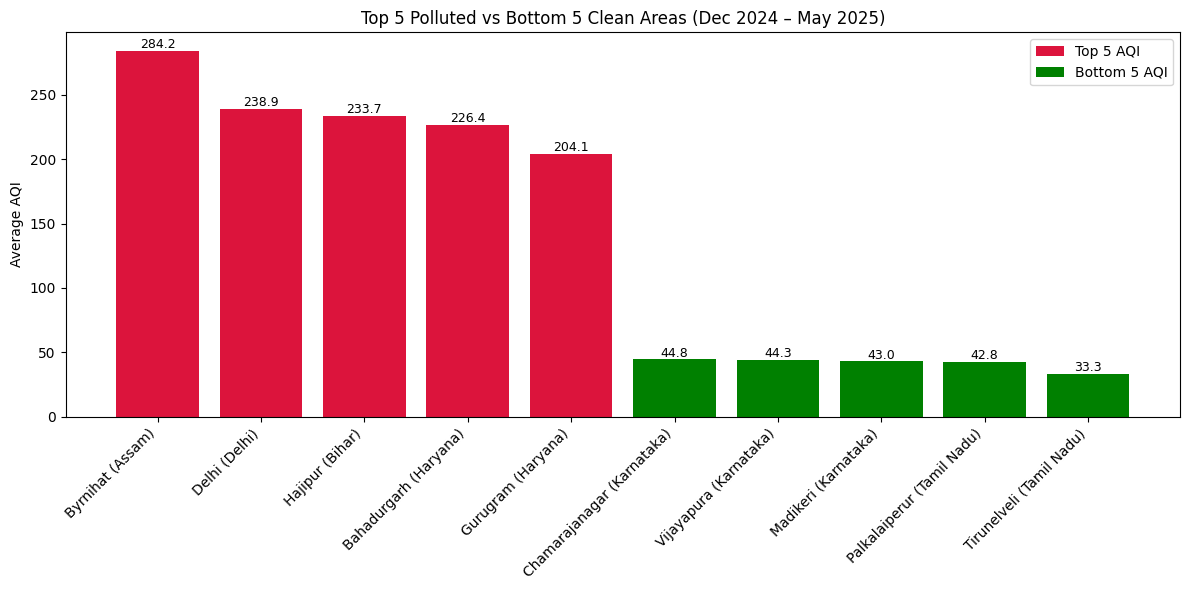

In [13]:
# Add labels like "Area (State)"
top_5['label'] = top_5['area'] + " (" + top_5['state'] + ")"
bottom_5['label'] = bottom_5['area'] + " (" + bottom_5['state'] + ")"

# Combine both for consistent plotting
labels = top_5['label'].tolist() + bottom_5['label'].tolist()
values = top_5['aqi_value'].tolist() + bottom_5['aqi_value'].tolist()
colors = ['crimson'] * 5 + ['green'] * 5

# X-axis positions
x = np.arange(len(labels))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(x, values, color=colors)

# Add labels & title
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Average AQI")
plt.title("Top 5 Polluted vs Bottom 5 Clean Areas (Dec 2024 – May 2025)")

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1), ha='center', fontsize=9)

# Add legend
plt.legend(handles=[bars[0], bars[5]], labels=['Top 5 AQI', 'Bottom 5 AQI'])

plt.tight_layout()
plt.show()


In [14]:
top_5.to_csv('top_5.csv', index=False)
bottom_5.to_csv('bottom_5.csv', index=False)